#### Assignment 2



#### **Helper Functions**

In [35]:
# Function to encrypt using Vigenere Encryption

def encrypt(plain_text, key):
    cipher_text = ""
    for i in range(len(plain_text)):
        x = ((ord(plain_text[i])-ord('a')) +
             (ord(key[i%(len(key))])-ord('a'))) % 26
        x += ord('a')
        cipher_text += chr(x)
    return cipher_text

In [36]:
# Function to decrypt using Vigenere Encryption

def decrypt(cipher_text, key):
    plain_text = ""
    for i in range(len(cipher_text)):
        x = ((ord(cipher_text[i])-ord('a')) -
             (ord(key[i%(len(key))])-ord('a'))) % 26
        x += ord('a')
        plain_text += chr(x)
    return plain_text

In [37]:
# Function to get prime factors of a number (useful in finding the key length)

def get_prime_factors(n):
    prime_factors=[]
    c = 2
    while(n > 1):
        if(n % c == 0):
            prime_factors.append(c)
            n = n / c
        else:
            c = c + 1
    return prime_factors

In [38]:
import matplotlib.pyplot as plt

# Function to plot a bar graph x->names, y->values. 
# (Ensure that names and values are lists, and names[i] is mapped to values[i])

def plot_bar_graph(names,values):
  plt.bar(range(len(names)), values, tick_label=names)
  plt.show()

#### **Preprocessing**
While encrypting, spaces, commas, quotes, underscores and full-stops aren't encrypted.

In [39]:
cipher_text= """Kg fcwd qh vin pnzy hjcocnt, cjjwg ku wnth nnyvng kxa cjjwg. Urfjm xwy yjg rbbufqwi "vjg_djxn_ofs_dg_rmncbgi" yq iq uqtxwlm. Oca zxw qcaj vjg tctnplyj hqs cjn pjcv ejbvdnt. Yt hkpe cjn gcnv, aqv okauy bknn ongm vt zvvgs vcpkh bqtft cjntj."""

In [40]:
cipher_text=cipher_text.lower()
cipher_text=cipher_text.replace(",","")
cipher_text=cipher_text.replace(".","")
cipher_text=cipher_text.replace("\"","")
cipher_text=cipher_text.replace("_","")

cipher_text

'kg fcwd qh vin pnzy hjcocnt cjjwg ku wnth nnyvng kxa cjjwg urfjm xwy yjg rbbufqwi vjgdjxnofsdgrmncbgi yq iq uqtxwlm oca zxw qcaj vjg tctnplyj hqs cjn pjcv ejbvdnt yt hkpe cjn gcnv aqv okauy bknn ongm vt zvvgs vcpkh bqtft cjntj'

In [41]:
cipher_text_concat=cipher_text.replace(" ","")

cipher_text_concat

'kgfcwdqhvinpnzyhjcocntcjjwgkuwnthnnyvngkxacjjwgurfjmxwyyjgrbbufqwivjgdjxnofsdgrmncbgiyqiquqtxwlmocazxwqcajvjgtctnplyjhqscjnpjcvejbvdntythkpecjngcnvaqvokauybknnongmvtzvvgsvcpkhbqtftcjntj'

### **Frequency analysis of given cipher text**

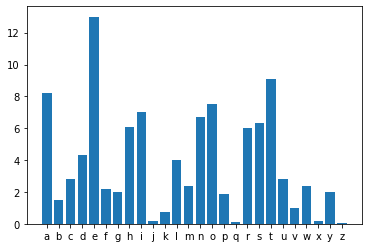

In [42]:
# The Relative frequency distribution in the English language

ideal_freq_dist={'a':8.2, 'b':1.5, 'c':2.8, 'd':4.3, 'e':13, 'f':2.2, 'g':2, 'h':6.1, 'i':7, 'j':0.15, 'k':0.77, 'l':4, 'm':2.4, 'n':6.7, 'o':7.5, 'p':1.9, 'q':0.095, 'r':6, 's':6.3, 't':9.1, 'u':2.8, 'v':0.98, 'w':2.4, 'x':0.15, 'y':2, 'z':0.074}

plot_bar_graph(list(ideal_freq_dist.keys()),list(ideal_freq_dist.values()))

{'a': 5, 'b': 6, 'c': 15, 'd': 4, 'e': 2, 'f': 5, 'g': 12, 'h': 6, 'i': 4, 'j': 18, 'k': 7, 'l': 2, 'm': 4, 'n': 18, 'o': 5, 'p': 5, 'q': 9, 'r': 3, 's': 3, 't': 11, 'u': 5, 'v': 12, 'w': 8, 'x': 5, 'y': 8, 'z': 3}
{'a': 2.7027027027027026, 'b': 3.2432432432432434, 'c': 8.108108108108109, 'd': 2.1621621621621623, 'e': 1.0810810810810811, 'f': 2.7027027027027026, 'g': 6.486486486486487, 'h': 3.2432432432432434, 'i': 2.1621621621621623, 'j': 9.72972972972973, 'k': 3.783783783783784, 'l': 1.0810810810810811, 'm': 2.1621621621621623, 'n': 9.72972972972973, 'o': 2.7027027027027026, 'p': 2.7027027027027026, 'q': 4.864864864864865, 'r': 1.6216216216216217, 's': 1.6216216216216217, 't': 5.9459459459459465, 'u': 2.7027027027027026, 'v': 6.486486486486487, 'w': 4.324324324324325, 'x': 2.7027027027027026, 'y': 4.324324324324325, 'z': 1.6216216216216217}


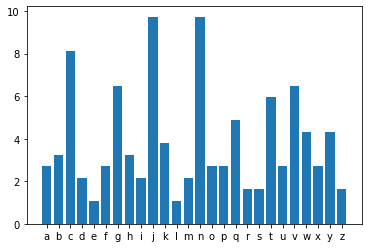

In [43]:
distribution={'a':0, 'b':0, 'c':0, 'd':0, 'e':0, 'f':0, 'g':0, 'h':0, 'i':0, 'j':0, 'k':0, 'l':0, 'm':0, 'n':0, 'o':0, 'p':0, 'q':0, 'r':0, 's':0, 't':0, 'u':0, 'v':0, 'w':0, 'x':0, 'y':0, 'z':0}

for j in range (0, len(cipher_text_concat)):
  distribution[cipher_text_concat[j]]=distribution[cipher_text_concat[j]]+1
print(distribution)
for alph in distribution:
  distribution[alph]=distribution[alph]*(100/len(cipher_text_concat))

print(distribution)
plot_bar_graph(list(distribution.keys()),list(distribution.values()))

There is a lot of flatness in the cipher text distribution. This indicates that the encryption is unlikely to be monoalphabetic. We try using one of the most common polyaplhabetic substitution.

### **Breaking Vigenere Encryption** 


#### **Finding Key Size**

In [44]:
digraph_positions=dict()

for i in range (0, len(cipher_text_concat)-1):
  digraph=cipher_text_concat[i]+cipher_text_concat[i+1]
  if digraph in digraph_positions.keys():
    digraph_positions[digraph].append(i)
  else:
    temp_list=[]
    temp_list.append(i)
    digraph_positions[digraph]=temp_list

print(digraph_positions)

{'kg': [0], 'gf': [1], 'fc': [2], 'cw': [3], 'wd': [4], 'dq': [5], 'qh': [6], 'hv': [7], 'vi': [8], 'in': [9], 'np': [10, 112, 122], 'pn': [11], 'nz': [12], 'zy': [13], 'yh': [14], 'hj': [15], 'jc': [16, 124], 'co': [17], 'oc': [18, 96], 'cn': [19, 144], 'nt': [20, 30, 132, 182], 'tc': [21, 109, 179], 'cj': [22, 42, 120, 140, 180], 'jj': [23, 43], 'jw': [24, 44], 'wg': [25, 45], 'gk': [26, 38], 'ku': [27], 'uw': [28], 'wn': [29], 'th': [31, 135], 'hn': [32], 'nn': [33, 157], 'ny': [34], 'yv': [35], 'vn': [36], 'ng': [37, 142, 160], 'kx': [39], 'xa': [40], 'ac': [41], 'gu': [46], 'ur': [47], 'rf': [48], 'fj': [49], 'jm': [50], 'mx': [51], 'xw': [52, 92, 100], 'wy': [53], 'yy': [54], 'yj': [55, 115], 'jg': [56, 67, 107], 'gr': [57, 77], 'rb': [58], 'bb': [59], 'bu': [60], 'uf': [61], 'fq': [62], 'qw': [63], 'wi': [64], 'iv': [65], 'vj': [66, 106], 'gd': [68], 'dj': [69], 'jx': [70], 'xn': [71], 'no': [72, 158], 'of': [73], 'fs': [74], 'sd': [75], 'dg': [76], 'rm': [78], 'mn': [79], 'nc':

In [45]:
for digraph in digraph_positions:
  if (len(digraph_positions[digraph])>2):
    print(digraph, ": ", digraph_positions[digraph])

np :  [10, 112, 122]
nt :  [20, 30, 132, 182]
tc :  [21, 109, 179]
cj :  [22, 42, 120, 140, 180]
ng :  [37, 142, 160]
xw :  [52, 92, 100]
jg :  [56, 67, 107]
jn :  [121, 141, 181]


In [46]:
diff_freq={}

for digraph in digraph_positions:
  if (len(digraph_positions[digraph])>2):
    for i in range (1, len(digraph_positions[digraph])):
      diff=digraph_positions[digraph][i]-digraph_positions[digraph][i-1]
      if diff in diff_freq.keys():
        diff_freq[diff]=diff_freq[diff]+1
      else:
        diff_freq[diff]=1

myKeys = list(diff_freq.keys())
myKeys.sort()
sorted_diff_freq = {i: diff_freq[i] for i in myKeys}

sorted_diff_freq

{8: 1,
 10: 2,
 11: 1,
 18: 1,
 20: 3,
 40: 4,
 50: 1,
 70: 1,
 78: 1,
 88: 1,
 102: 2,
 105: 1}

In [47]:
possible_lengths={}

for d in sorted_diff_freq.keys():
  prime_factors=get_prime_factors(d)
  for pf in prime_factors:
    if pf in possible_lengths.keys():
      possible_lengths[pf]=possible_lengths[pf]+sorted_diff_freq[d]
    else:
      possible_lengths[pf]=sorted_diff_freq[d]

possible_lengths

{2: 32, 5: 13, 11: 2, 3: 6, 7: 2, 13: 1, 17: 2}

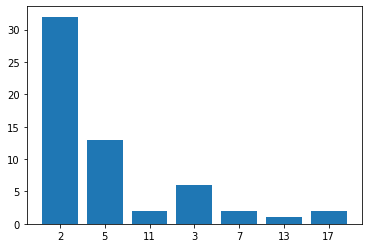

In [48]:
plot_bar_graph(list(possible_lengths.keys()),list(possible_lengths.values()))

The above analysis strongly suggests that the `key length` is `2`, `5` or `10`.

#### **Frequency Analysis** 
We assume key length to be `10`. In any case, since `2` and `5` are factors of `10`, this assumption includes the other possibilities as well.

In [49]:
ideal_freq_dist={'a':8.2, 'b':1.5, 'c':2.8, 'd':4.3, 'e':13, 'f':2.2, 'g':2, 'h':6.1, 'i':7, 'j':0.15, 'k':0.77, 'l':4, 'm':2.4, 'n':6.7, 'o':7.5, 'p':1.9, 'q':0.095, 'r':6, 's':6.3, 't':9.1, 'u':2.8, 'v':0.98, 'w':2.4, 'x':0.15, 'y':2, 'z':0.074}

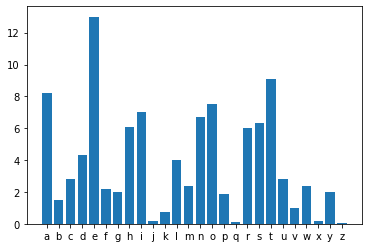

In [50]:
plot_bar_graph(list(ideal_freq_dist.keys()),list(ideal_freq_dist.values()))

In [51]:
freq_list=list(ideal_freq_dist.values())

In [52]:
def find_best_shift(dist, count):
  scores=[]
  adjust_factor=100/count
  for shift in range (0,26):
    a_id=(0+shift)%26 # 13%
    e_id=(4+shift)%26 # 8.2%

    score=dist[a_id]+dist[e_id]
    scores.append(score)
  # print(scores)
  return scores.index(max(scores))

shift by: 9  letter: j


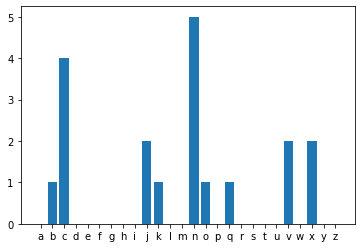

shift by: 15  letter: p


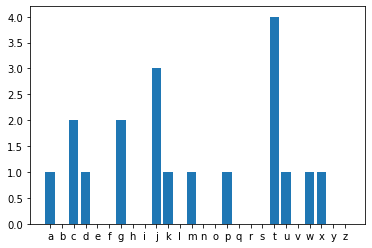

shift by: 9  letter: j


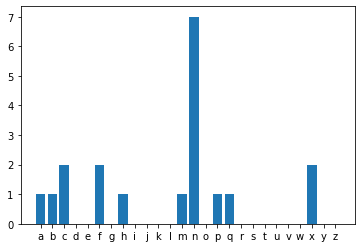

shift by: 2  letter: c


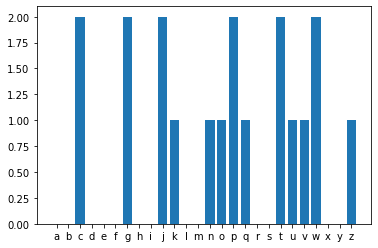

shift by: 5  letter: f


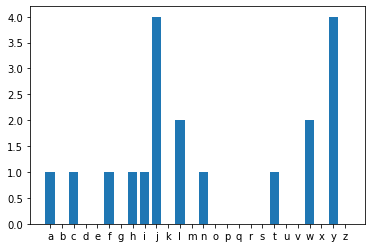

shift by: 24  letter: y


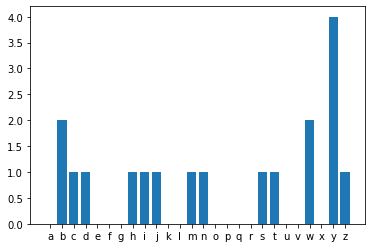

shift by: 17  letter: r


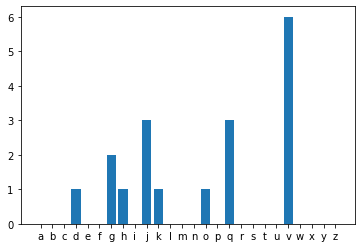

shift by: 2  letter: c


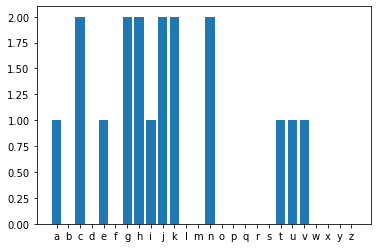

shift by: 2  letter: c


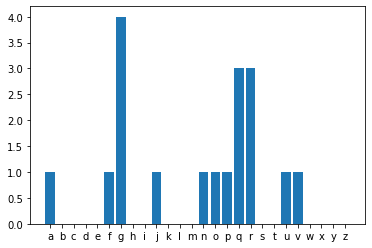

shift by: 1  letter: b


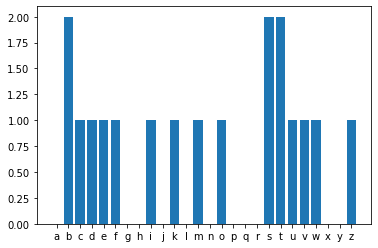

In [53]:
shifts=[]
key=""
for i in range (0,10):
  distribution={'a':0, 'b':0, 'c':0, 'd':0, 'e':0, 'f':0, 'g':0, 'h':0, 'i':0, 'j':0, 'k':0, 'l':0, 'm':0, 'n':0, 'o':0, 'p':0, 'q':0, 'r':0, 's':0, 't':0, 'u':0, 'v':0, 'w':0, 'x':0, 'y':0, 'z':0}
  count=0
  for j in range (i, len(cipher_text_concat),10):
    count=count+1
    distribution[cipher_text_concat[j]]=distribution[cipher_text_concat[j]]+1
  shifts.append(find_best_shift(list(distribution.values()),count))
  print("shift by:", shifts[i]," letter:",chr(ord('a')+shifts[i]))
  key+=chr(ord('a')+shifts[i])
  plot_bar_graph(list(distribution.keys()),list(distribution.values()))


In [54]:
key

'jpjcfyrccb'

In [55]:
plain_text=decrypt(cipher_text_concat,key)
plain_text

'brwarfzftheaextjsambeetheypisveeyliaelejoltheypspeaxoutasepasfworkehecaiemaumeplensedazgotheougoxayyohhavlehesteengasfortueneeechamoertvqindtueexpeyoufvrstdtllnerdtobetermngicdzrdstuere'

In [56]:
decryption_cleaned=""
spaces=0
for i in range (0, len(cipher_text)):
  if (cipher_text[i]==" "):
    decryption_cleaned+=" "
    spaces=spaces+1
  else:
    decryption_cleaned+=plain_text[i-spaces]

decryption_cleaned

'br warf zf the aext jsambee theyp is veey liaele jol theyp speax out ase pasfwork ehecaiemaumeplensed az go theougo xay yoh havl ehe steengas for tue neee chamoer tv qind tue expe you fvrst dtll nerd to beter mngic dzrds tuere'

The letters are still scrambled, indicating that the some part of the key is not correct (which is quite possible due to limited letters ~19 per distribution)

Strong guesses:


1.   `veey` seems to be `very`
2.   Since there were quotes around, it is likely that the word before is `password`. Our key gives `pasfwork`, which just adds to our bias.
3. `e->r` and `f->s` in the above points, were both encrypted with the same key, and our guesses are constant shift away from the wrong letters (i.e. `r-e = s-f`). Hence, it should have been: `t->r` and `u->s`. So `shift`~`t-r`=`u-s`=`2`. This means, the second character of the key is `c` and not `p`.
4. Now, `passwork`\~`password`. We also see many other errors with the 6th character of the key: `tv`\~`to`, `havl`\~`have`. This implies, `shift`=`5`, i.e. the key at the 6th position is `f` and not `y`.
5. Now, in the 7th character of the key, the errors seen: `zf`\~`of`, `tse`\~`the`,`tz`\~`to`. This implies, `shift`=`5`, i.e. the key at the 7th position is `c` and not `r`.
6. Finally, we see that all the words make sense. Hence, we conclude that `key`=`jcjcffcccb`.



###### Found key 
`key_found`=`jpjcfyrccb`. Let the `ith` character be denoted by `key[i]`.

In [57]:
print(cipher_text)
print("\n")

for c in decryption_cleaned:
  if (c==" "):
    print(" ",end="")
    continue
  else:
    print(c,end="")

kg fcwd qh vin pnzy hjcocnt cjjwg ku wnth nnyvng kxa cjjwg urfjm xwy yjg rbbufqwi vjgdjxnofsdgrmncbgi yq iq uqtxwlm oca zxw qcaj vjg tctnplyj hqs cjn pjcv ejbvdnt yt hkpe cjn gcnv aqv okauy bknn ongm vt zvvgs vcpkh bqtft cjntj


br warf zf the aext jsambee theyp is veey liaele jol theyp speax out ase pasfwork ehecaiemaumeplensed az go theougo xay yoh havl ehe steengas for tue neee chamoer tv qind tue expe you fvrst dtll nerd to beter mngic dzrds tuere

###### After updating `key[2]`

In [58]:
key_updated1="jcjcfyrccb"

In [59]:
plain_text=decrypt(cipher_text_concat,key_updated1)
print(plain_text)

decryption_cleaned=""
spaces=0
for i in range (0, len(cipher_text)):
  if (cipher_text[i]==" "):
    decryption_cleaned+=" "
    spaces=spaces+1
  else:
    decryption_cleaned+=plain_text[i-spaces]

print(decryption_cleaned)

bewarfzfthenextjsambertheypisveryliaelejoytheypspeakoutasepassworkehecavemaumepleasedazgothrougoxayyouhavlehestrengasfortheneeechambertvqindtheexpeyoufirstdtllneedtobetermagicdzrdsthere
be warf zf the next jsamber theyp is very liaele joy theyp speak out ase passwork ehecavemaumepleased az go througo xay you havl ehe strengas for the neee chamber tv qind the expe you first dtll need to beter magic dzrds there


In [60]:
print(cipher_text)
print("\n")

for c in decryption_cleaned:
  if (c==" "):
    print(" ",end="")
    continue
  else:
    print(c,end="")

kg fcwd qh vin pnzy hjcocnt cjjwg ku wnth nnyvng kxa cjjwg urfjm xwy yjg rbbufqwi vjgdjxnofsdgrmncbgi yq iq uqtxwlm oca zxw qcaj vjg tctnplyj hqs cjn pjcv ejbvdnt yt hkpe cjn gcnv aqv okauy bknn ongm vt zvvgs vcpkh bqtft cjntj


be warf zf the next jsamber theyp is very liaele joy theyp speak out ase passwork ehecavemaumepleased az go througo xay you havl ehe strengas for the neee chamber tv qind the expe you first dtll need to beter magic dzrds there

##### After updating `key[6]`

In [61]:
key_updated1="jcjcffrccb"

In [62]:
plain_text=decrypt(cipher_text_concat,key_updated1)
print(plain_text)

decryption_cleaned=""
spaces=0
for i in range (0, len(cipher_text)):
  if (cipher_text[i]==" "):
    decryption_cleaned+=" "
    spaces=spaces+1
  else:
    decryption_cleaned+=plain_text[i-spaces]

print(decryption_cleaned)

bewaryzfthenextcsambertherpisverylitelejoytherpspeakouttsepasswordehecavemanmepleasedtzgothroughxayyouhaveehestrengtsforthenexechambertoqindtheexieyoufirstwtllneedtouetermagicwzrdsthere
be wary zf the next csamber therp is very litele joy therp speak out tse password ehecavemanmepleased tz go through xay you have ehe strengts for the nexe chamber to qind the exie you first wtll need to ueter magic wzrds there


In [63]:
print(cipher_text)
print("\n")

for c in decryption_cleaned:
  if (c==" "):
    print(" ",end="")
    continue
  else:
    print(c,end="")

kg fcwd qh vin pnzy hjcocnt cjjwg ku wnth nnyvng kxa cjjwg urfjm xwy yjg rbbufqwi vjgdjxnofsdgrmncbgi yq iq uqtxwlm oca zxw qcaj vjg tctnplyj hqs cjn pjcv ejbvdnt yt hkpe cjn gcnv aqv okauy bknn ongm vt zvvgs vcpkh bqtft cjntj


be wary zf the next csamber therp is very litele joy therp speak out tse password ehecavemanmepleased tz go through xay you have ehe strengts for the nexe chamber to qind the exie you first wtll need to ueter magic wzrds there

##### After updating `key[7]`

In [64]:
key_updated1="jcjcffcccb"

In [65]:
plain_text=decrypt(cipher_text_concat,key_updated1)
print(plain_text)

decryption_cleaned=""
spaces=0
for i in range (0, len(cipher_text)):
  if (cipher_text[i]==" "):
    decryption_cleaned+=" "
    spaces=spaces+1
  else:
    decryption_cleaned+=plain_text[i-spaces]

print(decryption_cleaned)

bewaryofthenextchamberthereisverylittlejoytherespeakoutthepasswordthecavemanbepleasedtogothroughmayyouhavethestrengthforthenextchambertofindtheexityoufirstwillneedtouttermagicwordsthere
be wary of the next chamber there is very little joy there speak out the password thecavemanbepleased to go through may you have the strength for the next chamber to find the exit you first will need to utter magic words there


In [66]:
print(cipher_text)
print("\n")

for c in decryption_cleaned:
  if (c==" "):
    print(" ",end="")
    continue
  else:
    print(c,end="")

kg fcwd qh vin pnzy hjcocnt cjjwg ku wnth nnyvng kxa cjjwg urfjm xwy yjg rbbufqwi vjgdjxnofsdgrmncbgi yq iq uqtxwlm oca zxw qcaj vjg tctnplyj hqs cjn pjcv ejbvdnt yt hkpe cjn gcnv aqv okauy bknn ongm vt zvvgs vcpkh bqtft cjntj


be wary of the next chamber there is very little joy there speak out the password thecavemanbepleased to go through may you have the strength for the next chamber to find the exit you first will need to utter magic words there